# Challenge: Data Cleaning & Validation


Data cleaning is definitely a "practice makes perfect" skill. Using this dataset of article open-access prices paid by the WELLCOME Trust between 2012 and 2013, determine the five most common journals and the total articles for each. Next, calculate the mean, median, and standard deviation of the open-access cost per article for each journal . 

Write a cleaning script that will load the raw data and whip it into shape with well-commented code. 

In [1]:
## Import modules 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import seaborn as sns
%matplotlib inline

In [2]:
### Read the csv into python ###
## The encoding has to be ISO-8859-1 or Latin-1 for pandas to be able to read the .csv, both seem to work. 
## UTF-8 and UTF-16 will not work.
df = pd.read_csv(r'WELLCOME_APCspend2013_forThinkful.csv', encoding='Latin-1')
df.head(10)

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88
5,PMC3579457,ACS,Journal of Medicinal Chemistry,Comparative Structural and Functional Studies ...,£2392.20
6,PMC3709265,ACS,Journal of Proteome Research,Mapping Proteolytic Processing in the Secretom...,£2367.95
7,23057412 PMC3495574,ACS,Mol Pharm,Quantitative silencing of EGFP reporter gene b...,£649.33
8,PMCID: PMC3780468,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,A Novel Allosteric Inhibitor of the Uridine Di...,£1294.59
9,PMCID: PMC3621575,ACS (Amercian Chemical Society) Publications,ACS Chemical Biology,Chemical proteomic analysis reveals the drugab...,£1294.78


In [3]:
## Provide the count, unique number, the top, and frequency
df.describe()

,PMID/PMCID,Publisher,Journal title,Article title,COST (£) charged to Wellcome (inc VAT when charged)
count,1928,2127,2126,2127,2127
unique,1880,299,984,2126,1402
top,-,Elsevier,PLoS One,"Exclusive breastfeeding, diarrhoel morbidity a...",£2040.00
freq,7,387,92,2,94


In [4]:
## Provide the current names for the columns
df.columns

Index(['PMID/PMCID', 'Publisher', 'Journal title', 'Article title',
       ' COST (£) charged to Wellcome (inc VAT when charged) '],
      dtype='object')

In [5]:
#Drop the PMID/PMCID column.
data = df.drop('PMID/PMCID',axis=1) 
#Renames columns for ease of reference.
data.rename(columns={'Journal title': 'Journal', 'Article title':'Article', ' COST (£) charged to Wellcome (inc VAT when charged) ':'Cost'}, inplace=True) 
#Drops any NA values in any of the columns.
data = data.dropna(subset=['Publisher','Journal','Article'])
#Removes all currency symbol occurrences. 
data.Cost = data.Cost.map(lambda x: x.lstrip('£').rstrip('£')) ## Does not work, does not strip strings from Cost column

In [6]:
data['Cost'] = data['Cost'].astype(str).str.replace('\D+', '') ## Removes all non-digits from the cost column

In [7]:
#Checks data type by series. 
data.dtypes
#Converts cost into a float: publisher, journal, and article are already strings.
data.Cost = data.Cost.map(lambda x: float(x))

In [8]:
#Removes all string columns leading/trailing whitespace.
data.Publisher = data.Publisher.map(lambda x: x.strip())
data.Journal = data.Journal.map(lambda x: x.strip())
data.Article = data.Article.map(lambda x: x.strip())

In [9]:
#Removes all non-alphanumeric, non-hyphen characters from all string columns.
data.Publisher = data.Publisher.str.extract("([a-zA-Z0-9:\(\)\+/&,\-]*)",expand=True)

In [10]:
#Converts string columns to all-capital case.
data.Publisher = data.Publisher.str.upper()
data.Journal = data.Journal.str.upper()
data.Article = data.Article.str.upper()

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


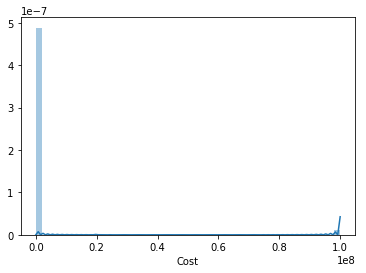

In [12]:
#Checks the distribution of cost to determine plausibility and identify winsorization candidates.
plt.show(sns.distplot(data.Cost))
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)
data.sort_values(by='Cost',inplace=True)

In [40]:
data.head(10)

,Publisher,Journal,Article,Cost
243,BIOMED,VETERINARY RESEARCH,UNDERSTANDING FOOT-AND-MOUTH DISEASE VIRUS TRA...,993.0
1599,PUBLIC,PLOS PATHOGENS,TRANSMISSION OF EQUINE INFLUENZA VIRUS DURING ...,1440.0
183,BIOMED,BMC GENOMICS,ADVANCES IN GENOME-WIDE RNAI CELLULAR SCREENS:...,1476.0
178,BIOMED,BMC BIOLOGY,DETAILED INTERROGATION OF TRYPANOSOME CELL BIO...,1674.0
180,BIOMED,BMC GENOME BIOLOGY,PATTERNS OF PROKARYOTIC LATERAL GENE TRANSFERS...,2010.0
100,AMERICAN,AMERICAN SOCIETY FOR NUTRITION,THE ASSOCIATION BETWEEN BREASTFEEDING AND HIV ...,4594.0
1469,PUBLIC,PLOS ONE,HOW WELL ARE MALARIA MAPS USED TO DESIGN AND ...,12231.0
182,BIOMED,BMC GENOMICS,ENHANCING THE UTILITY OF PROTEOMICS SIGNATURE ...,12546.0
1677,SCIEDU,JOURNAL OF BIOMEDICAL GRAPHICS AND COMPUTING,FUNCTIONAL MRI DEMONSTRATES PAIN PERCEPTION IN...,13529.0
179,BIOMED,BMC GENETICS,THE PHYSICAL CAPABILITY OF COMMUNITY-BASED MEN...,13758.0


## Determine the five most common journals and the total articles for each

In [15]:
## top five Journals
top_five = data.groupby('Journal')[['Article']].count().sort_values(by=['Article'],ascending=False)
top_five.columns = ['Article Count']
top_five.head(5)


,Article Count
Journal,
PLOS ONE,190
JOURNAL OF BIOLOGICAL CHEMISTRY,53
NEUROIMAGE,29
NUCLEIC ACIDS RESEARCH,26
PLOS GENETICS,24


## Calculate the mean, median, and standard deviation of the open-access cost per article for each journal

In [16]:
## Mean, Median, and Standard Deviation
mean = data.groupby('Journal')[['Cost']].mean()
mean.columns = ['Mean']
meanperarticle = pd.concat([mean,top_five],axis=1)
meanperarticle.columns = ['Mean','Article Count']
meanperarticle['Mean Per Article'] = meanperarticle['Mean']/meanperarticle['Article Count']
meanperarticle.head(5)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,Mean,Article Count,Mean Per Article
ACADEMY OF NUTRITION AND DIETETICS,237954.0,1,237954.00
ACS CHEMICAL BIOLOGY,141818.6,5,28363.72
ACS CHEMICAL NEUROSCIENCE,118680.0,1,118680.00
ACS NANO,66814.0,2,33407.00
"ACTA CRYSTALLOGRAPHICA SECTION D, BIOLOGICAL CRYSTALLOGRAPHY",77142.0,1,77142.00


In [17]:
median = data.groupby('Journal')[['Cost']].median()
median.columns = ['Median']
medianperarticle = pd.concat([median,top_five],axis=1)
medianperarticle.columns = ['Median','Article Count']
medianperarticle['Median Per Article'] = medianperarticle['Median']/medianperarticle['Article Count']
medianperarticle.head(5)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,Median,Article Count,Median Per Article
ACADEMY OF NUTRITION AND DIETETICS,237954.0,1,237954.0
ACS CHEMICAL BIOLOGY,129459.0,5,25891.8
ACS CHEMICAL NEUROSCIENCE,118680.0,1,118680.0
ACS NANO,66814.0,2,33407.0
"ACTA CRYSTALLOGRAPHICA SECTION D, BIOLOGICAL CRYSTALLOGRAPHY",77142.0,1,77142.0


In [18]:
deviation = data.groupby('Journal')[['Cost']].std()
deviation.columns = ['Standard Deviation']
deviation.fillna(0, inplace=True)
deviationperarticle = pd.concat([deviation,top_five],axis=1)
deviationperarticle.columns = ['Standard Deviation','Article Count']
deviationperarticle['Standard Deviation Per Article'] = deviationperarticle['Standard Deviation']/deviationperarticle['Article Count']
deviationperarticle.head()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,Standard Deviation,Article Count,Standard Deviation Per Article
ACADEMY OF NUTRITION AND DIETETICS,0.000000,1,0.000000
ACS CHEMICAL BIOLOGY,50730.956006,5,10146.191201
ACS CHEMICAL NEUROSCIENCE,0.000000,1,0.000000
ACS NANO,3570.889245,2,1785.444622
"ACTA CRYSTALLOGRAPHICA SECTION D, BIOLOGICAL CRYSTALLOGRAPHY",0.000000,1,0.000000


## Various plots of Cost

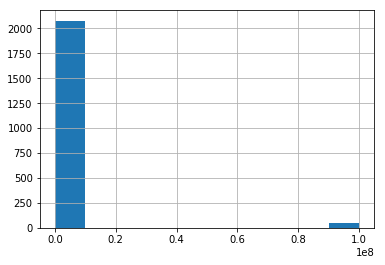

In [19]:
data.Cost.hist()

(array([2.077e+03, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 4.700e+01]),
 array([9.93000000e+02, 1.00008837e+07, 2.00007744e+07, 3.00006651e+07,
        4.00005558e+07, 5.00004465e+07, 6.00003372e+07, 7.00002279e+07,
        8.00001186e+07, 9.00000093e+07, 9.99999000e+07]),
 <a list of 10 Patch objects>)

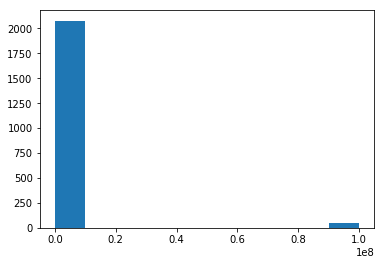

In [20]:
plt.hist(data['Cost'])

Line plots showing costs of articles


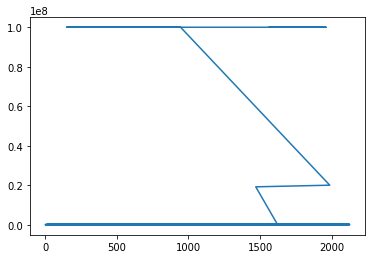

In [21]:
print('Line plots showing costs of articles')
plt.plot(data.iloc[0:]['Cost'])
plt.show()

QQ plots showing how close a cost is to known distribution, and any outliers.


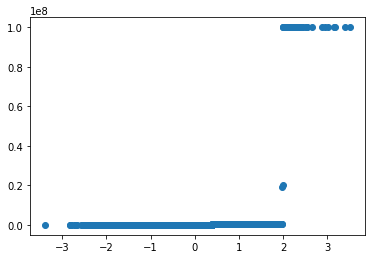

In [22]:
print('QQ plots showing how close a cost is to known distribution, and any outliers.')
norm= np.random.normal(0, 1, 2126)
norm.sort()
plt.plot(norm, data['Cost'].sort_values(), "o") 
plt.show() 